# Supernova

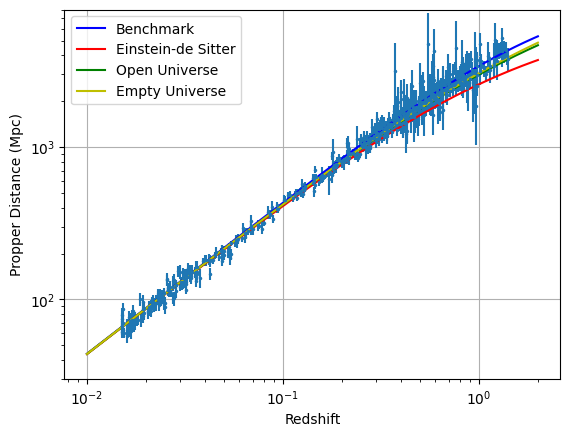

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

plt.close('all')

#Load supernova data
data = np.loadtxt('SN_SCP.data')
zdata = np.array(data[:,0])
dlumdata = 10**(0.2*(np.array(data[:,1])-25))
dlumerror = 10**(0.2*(np.array(data[:,1])+np.array(data[:,2])-25))-dlumdata
ddata = dlumdata/(1+zdata)
derror = dlumerror/(1+zdata)


#Calculate models
def drdz(z):
    #return -1./np.sqrt(omegam*(1.+z)**3 + omegal + (1-omegao)*(1.+z)**2)
    return -1./np.sqrt(omegam*(1.+z)**3 + omegal + (1-omegao)*(1.+z)**2)

z = (np.arange(1,201,1))/100.

#Benchmark
H = 68.
c = 3.e5
omegam = 0.3
omegal = 0.7
omegao = omegam+omegal
d = [0 for x in range(200)]
for n in range(200):
    I = spi.quad(drdz,z[n],0)
    d[n] = (c/H)*I[0]
dbm = d

#Einstein-de Sitter
omegam = 1.0
omegal = 0.0
omegao = omegam+omegal
d = [0 for x in range(200)]
for n in range(200):
    I = spi.quad(drdz,z[n],0)
    d[n] = (c/H)*I[0]
deds = d

#Open
omegam = 0.1
omegal = 0.0
omegao = omegam+omegal
d = [0 for x in range(200)]
for n in range(200):
    I = spi.quad(drdz,z[n],0)
    d[n] = (c/H)*I[0]
do = d

#Empty
omegam = 0.0
omegal = 0.0
omegao = omegam+omegal
d = [0 for x in range(200)]
for n in range(200):
    I = spi.quad(drdz,z[n],0)
    d[n] = (c/H)*I[0]
de = d

#Make the plot: distance vs. redshift
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
ax.errorbar(zdata,ddata,yerr=derror,fmt='.',ms=3)
#ax.set(xlabel='Redshift', ylabel='Propper Distance (Mpc)',yscale='log',xscale="log",ylim=(30,8000))
ax.set(xlabel='Redshift', ylabel='Propper Distance (Mpc)',ylim=(30,8000))
ax.plot(z, dbm, 'b', label='Benchmark')
ax.plot(z, deds, 'r', label='Einstein-de Sitter')
ax.plot(z, do, 'g', label='Open Universe')
ax.plot(z, de, 'y', label='Empty Universe')
ax.legend()
fig.savefig("test2.png")
plt.show()


